In [ ]:
pip install spacy pandas gensim

In [ ]:
import spacy
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

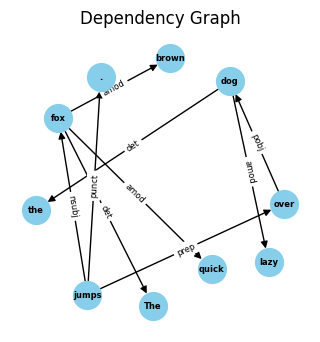

In [ ]:
# Initialize Spacy model for dependency parsing
nlp = spacy.load('en_core_web_sm')

# Modified Dependency Graph Creation Function
def create_dependency_graph(sentence):
    doc = nlp(sentence)
    G = nx.DiGraph()
    for token in doc:
        G.add_node(token.text)
        if token.dep_ != 'ROOT':  # Avoid adding an edge from the root to itself
            G.add_edge(token.head.text, token.text, label=token.dep_)
    return G

# Visualization Function
def draw_dependency_graph(G):
    pos = nx.spring_layout(G, k=-1)  # Adjust 'k' to change the distance between nodes
    plt.figure(figsize=(3, 3))
    nx.draw(G, pos, with_labels=True, node_size=400, node_color='skyblue', font_size=6, font_weight='bold')
    edge_labels = dict([((u, v,), d['label']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, font_size=6, edge_labels=edge_labels)
    plt.title('Dependency Graph')
    plt.show()

# Example Usage
sentence = "The quick brown fox jumps over the lazy dog."
G = create_dependency_graph(sentence)
draw_dependency_graph(G)

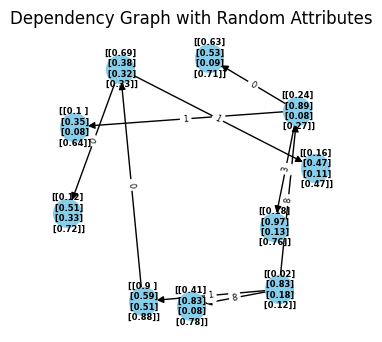

In [ ]:
import random

# Visualization Function with random 4D vectors and labels
def draw_dependency_graph(G):
    pos = nx.spring_layout(G, k=-1)  # Adjust 'k' to change the distance between nodes
    plt.figure(figsize=(3, 3))

    # Generating random 4D vectors for nodes and random labels for edges
    node_labels = {node: f'{np.round(np.random.rand(4), 2).reshape(-1, 1)}' for node in G.nodes()}
    edge_labels = {(u, v): f'{random.randint(0, 8)}' for u, v, d in G.edges(data=True)}

    # Drawing nodes with updated labels
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=400, node_color='skyblue', font_size=6, font_weight='bold')

    # Drawing edges with updated labels
    nx.draw_networkx_edge_labels(G, pos, font_size=6, edge_labels=edge_labels)

    plt.title('Dependency Graph with Random Attributes')
    plt.show()

# Example Usage
sentence = "The quick brown fox jumps over the lazy dog."
G = create_dependency_graph(sentence)
draw_dependency_graph(G)